# Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
#Changing the directory
os.chdir('/content/drive/My Drive/CPCS 483/Final')

Mounted at /content/drive


## Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.14.0'

## Part 1 - Data Preprocessing

### Importing the dataset - preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 3s 0us/step


## Part 2 - Building the CNN

### Initializing the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer
Step 1 - Convolution filters = numbers of feature detectors, kernel = size of feature detector 3 by 3, input shape of
images RGB, black and white instead of 3 we need to choose 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], strides = [1, 1], activation='relu', padding='same'))

Step 2 - Batch Normalization Layer

In [ ]:
cnn.add(layers.BatchNormalization())

Step 3 - Pooling the size of the squre, stride the move or sliding

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], strides = [1, 1], activation='relu', padding='same'))
cnn.add(layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Third convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[3, 3], strides = [1, 1], activation='relu', padding='same'))
cnn.add(layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Flattering

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Dropout Layer

In [ ]:
cnn.add(layers.Dropout(0.2))

### Full Connection - Dense Layer (2)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['sparse_categorical_accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
batch_size = 32
epochs = 25
history = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 85s 68ms/step - loss: 0.6170 - sparse_categorical_accuracy: 0.7807 - val_loss: 0.7876 - val_sparse_categorical_accuracy: 0.7353
Epoch 2/25
1250/1250 [==============================] - 88s 70ms/step - loss: 0.5869 - sparse_categorical_accuracy: 0.7894 - val_loss: 0.8260 - val_sparse_categorical_accuracy: 0.7225
Epoch 3/25
1250/1250 [==============================] - 85s 68ms/step - loss: 0.5586 - sparse_categorical_accuracy: 0.8011 - val_loss: 0.8530 - val_sparse_categorical_accuracy: 0.7189
Epoch 4/25
1250/1250 [==============================] - 83s 66ms/step - loss: 0.5312 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.7824 - val_sparse_categorical_accuracy: 0.7417
Epoch 5/25
1250/1250 [==============================] - 85s 68ms/step - loss: 0.5074 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.8004 - val_sparse_categorical_accuracy: 0.7429
Epoch 6/25
1250/1250 [==============================] - 86s 68ms/step - loss: 0.

Obtaining the training and evaluation history

In [ ]:
train_history = cnn.fit(x_train, y_train)
evaluate_history = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.8293 - sparse_categorical_accuracy: 0.7441


## Part 4 - Making the predictions and evaluating the model

### Plotting the training history

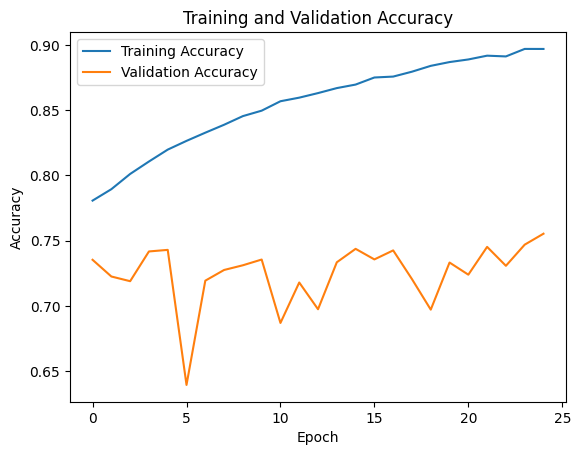

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Printing test accuracy

In [ ]:
print("Test Accuracy:", evaluate_history)

Test Accuracy: [0.8293173909187317, 0.7440999746322632]


### Making predictions on the test set

In [ ]:
import numpy as np
y_pred = np.argmax(cnn.predict(x_test), axis=1)

313/313 [==============================] - 8s 25ms/step


### confusion matrix and classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[807  25  32  19  16   8   6  10  50  27]
 [ 18 886   6  14   0   4   4   6  20  42]
 [ 74   3 636  66  72  55  58  29   5   2]
 [ 26   4  65 552  54 202  52  35   3   7]
 [ 30   2  76  57 692  56  42  39   5   1]
 [ 14   3  33 173  28 691  17  35   2   4]
 [ 10   3  43  55  25  41 809   6   7   1]
 [ 19   3  30  32  48  56   9 797   3   3]
 [ 79  37  15  10  13  12   3   8 807  16]
 [ 42  95  11  21   4  12   4  19  28 764]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.84      0.89      0.86      1000
           2       0.67      0.64      0.65      1000
           3       0.55      0.55      0.55      1000
           4       0.73      0.69      0.71      1000
           5       0.61      0.69      0.65      1000
           6       0.81      0.81      0.81      1000
           7       0.81      0.80      0.80      1000
           8       0.87      0.81      